In [1]:
# import alexmods
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('axes', labelsize=20)

In [34]:
# Import the linelists
# Define the file path
data_file_path = "/Users/xwou/Dropbox/20200609_smhr/"

# Import the lines from RPA
RPA = np.genfromtxt(data_file_path+"RPA-lightelement-linelist-v2-20190813.moog")

# Import the lines from Alex
Alex = np.genfromtxt(data_file_path+"s5eqw_short.moog")

# Import actually measured lines for SMSS1_15 with two linelists
RPA_smss1_15 = np.genfromtxt(data_file_path+"smss1_15_RPA_lines", skip_header=2)
Alex_smss1_15 = np.genfromtxt(data_file_path+"smss1_15_alex_lines", skip_header=2)

In [37]:
# Pick out the Fe I lines 
RPA_fe1_ind = np.where(RPA[:,1] == 26)[0]
Alex_fe1_ind = np.where(Alex[:,1] == 26)[0]

RPA_fe1, Alex_fe1 = RPA[RPA_fe1_ind,:], Alex[Alex_fe1_ind,:]
print(len(RPA_fe1_ind),len(Alex_fe1_ind))

# for smss1_15
RPA_fe1_ind_smss = np.where(RPA_smss1_15[:,0] == 26)[0]
Alex_fe1_ind_smss = np.where(Alex_smss1_15[:,0] == 26)[0]

RPA_fe1_smss1_15, Alex_fe1_smss1_15 = RPA_smss1_15[RPA_fe1_ind_smss,:], Alex_smss1_15[Alex_fe1_ind_smss,:]
print(len(RPA_fe1_ind_smss),len(Alex_fe1_ind_smss))


274 183
159 139


In [38]:
# Cross match the wavelengths allowing 0.1 A difference
# Create an array to store the results with coloumns: RPA_wl, Alex_wl, RPA_EP, Alex_EP, RPA_loggf, Alex_loggf
CM_fe1 = []

for i in range(len(RPA_fe1_ind)):
    RPA_wl = RPA_fe1[i,0]
    for j in range(len(Alex_fe1_ind)):
        Alex_wl = Alex_fe1[j,0]
        if abs(RPA_wl-Alex_wl) < 0.1:
            CM_fe1.append([RPA_wl,Alex_wl,RPA_fe1[i,2],Alex_fe1[j,2],RPA_fe1[i,3],Alex_fe1[j,3]])

CM_fe1 = np.array(CM_fe1)

# Create an array to store the results for SMSS1_15: RPA_wl, Alex_wl, RPA_EP, Alex_EP, RPA_loggf, Alex_loggf, RPA_EW, Alex_EW
CM_fe1_smss = []

for i in range(len(RPA_fe1_ind_smss)):
    RPA_wl = RPA_fe1_smss1_15[i,1]
    for j in range(len(Alex_fe1_ind_smss)):
        Alex_wl = Alex_fe1_smss1_15[j,1]
        if abs(RPA_wl-Alex_wl) < 0.1:
            CM_fe1_smss.append([RPA_wl,Alex_wl,RPA_fe1_smss1_15[i,2],Alex_fe1_smss1_15[j,2],
                           RPA_fe1_smss1_15[i,3],Alex_fe1_smss1_15[j,3],RPA_fe1_smss1_15[i,4],Alex_fe1_smss1_15[j,4]])

CM_fe1_smss = np.array(CM_fe1_smss)


In [39]:
print(np.shape(CM_fe1),np.shape(CM_fe1_smss))

(100, 6) (83, 8)


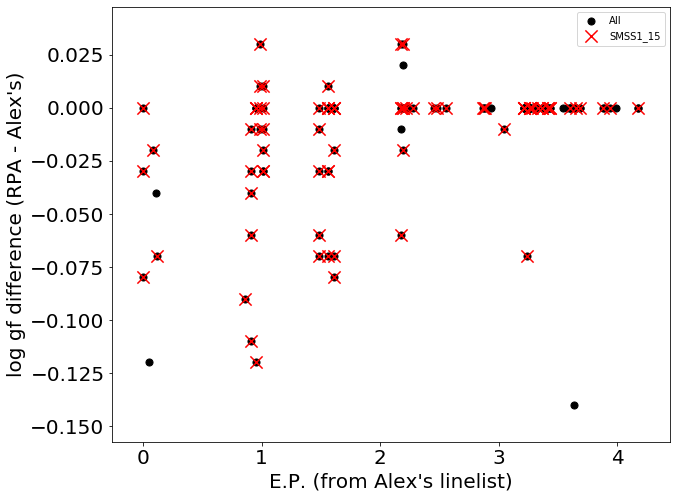

In [56]:
# Plot the difference in loggf as a function of E.P. from Alex
f = plt.figure(figsize=[10,8])
plt.scatter(CM_fe1[:,3],CM_fe1[:,4]-CM_fe1[:,5],s=50,c='k',label='All')
plt.scatter(CM_fe1_smss[:,3],CM_fe1_smss[:,4]-CM_fe1_smss[:,5],marker="x",s=150,c='r',label='SMSS1_15')
plt.xlabel("E.P. (from Alex's linelist)")
plt.ylabel("log gf difference (RPA - Alex's)")
plt.legend()
plt.show()
f.savefig("diff_loggf_vs_EP.pdf",bbox_inches='tight')

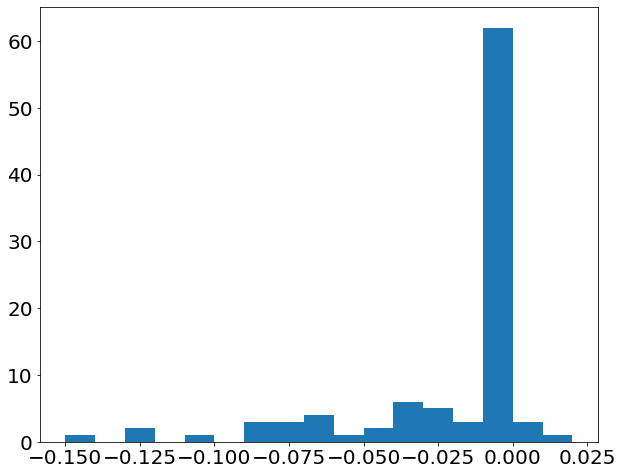

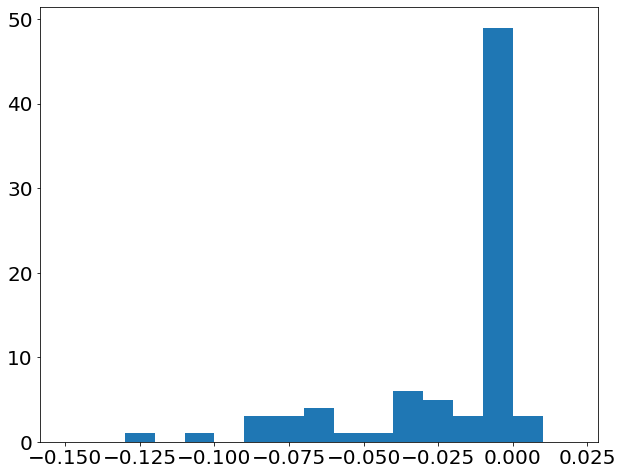

In [53]:
# Plot a distribution of the loggf difference
bin_bon = np.arange(-0.15,0.03,0.01)

plt.figure(figsize=[10,8])
plt.hist(CM_fe1[:,4]-CM_fe1[:,5],bin_bon)
plt.show()

plt.figure(figsize=[10,8])
plt.hist(CM_fe1_smss[:,4]-CM_fe1_smss[:,5],bin_bon)
plt.show()

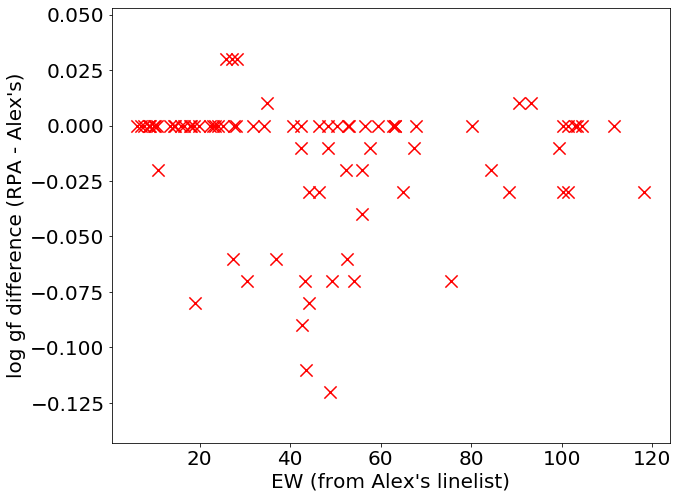

In [57]:
# Plot the log gf differences as a function of EW from Alex's lines
f = plt.figure(figsize=[10,8])
plt.scatter(CM_fe1_smss[:,7],CM_fe1_smss[:,4]-CM_fe1_smss[:,5],marker="x",s=150,c='r')
plt.xlabel("EW (from Alex's linelist)")
plt.ylabel("log gf difference (RPA - Alex's)")
plt.show()
f.savefig("diff_loggf_vs_EW_smss1_15.pdf",bbox_inches='tight')

In [85]:
# Define the file path
data_file_path = "/Users/xwou/Dropbox/20200609_smhr/"
# Import all stellar parameters
smss_param = np.genfromtxt(data_file_path+"Record0808_csv.csv", skip_header=1, delimiter=',')

In [9]:
smss_param[:,4]

array([4420., 4990., 4730., 4730., 5100., 4670., 4780., 4380., 4950.,
       4750., 5450., 4800., 4700., 4730., 5000., 4760., 4730., 4970.,
       5550., 5630., 4680.,   nan, 4350., 4460., 4860., 4780., 4700.,
       4970., 4650., 4750., 4860., 4400., 4380., 4800., 4590., 4980.,
       4600., 4480., 4660., 4620.])

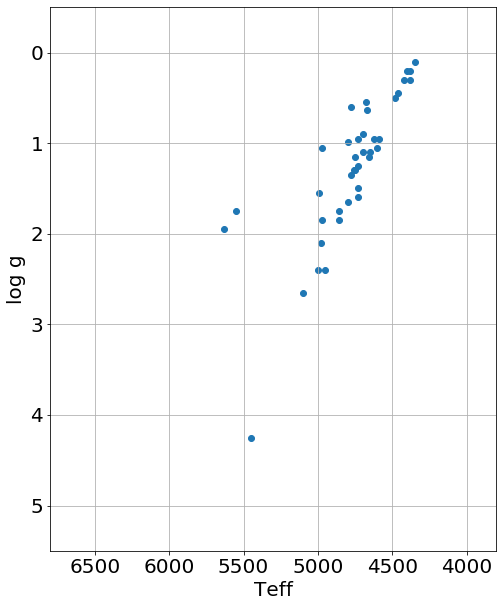

In [12]:
# Plot the isochrone
f = plt.figure(figsize=[8,10])
plt.scatter(smss_param[:,4],smss_param[:,5])
plt.xlabel('Teff')
plt.ylabel('log g')
plt.xlim([6800,3800])
plt.ylim([5.5,-0.5])
plt.grid()
plt.show()

In [31]:
# Import the isochrones from Alex's mods
iso_file_path = "/Users/xwou/Documents/Research/utilities/alexmods/alexmods/alexmods/data/isochrones/"
isochrone_logteff_logg_25 = np.genfromtxt(iso_file_path+"dartmouth_DECAM_MH-25ap4.iso",usecols=(2,3))
isochrone_logteff_logg_20 = np.genfromtxt(iso_file_path+"dartmouth_DECAM_MH-20ap4.iso",usecols=(2,3))
isochrone_logteff_logg_15 = np.genfromtxt(iso_file_path+"dartmouth_DECAM_MH-15ap4.iso",usecols=(2,3))

In [1]:
# Plot the isochrone for five ages
f = plt.figure(figsize=[8,10])
plt.plot(10**isochrone_logteff_logg_25[:267,0],isochrone_logteff_logg_25[:267,1],label="[Fe/H] = -2.5")
plt.plot(10**isochrone_logteff_logg_20[:267,0],isochrone_logteff_logg_20[:267,1],label="[Fe/H] = -2.0")
plt.plot(10**isochrone_logteff_logg_15[:267,0],isochrone_logteff_logg_15[:267,1],label="[Fe/H] = -1.5")
# plt.plot(10**isochrone_logteff_logg[267:534,0],isochrone_logteff_logg[267:534,1])
# plt.plot(10**isochrone_logteff_logg[534:800,0],isochrone_logteff_logg[534:800,1])
# plt.plot(10**isochrone_logteff_logg[800:1066,0],isochrone_logteff_logg[800:1066,1])
# plt.plot(10**isochrone_logteff_logg[1066:,0],isochrone_logteff_logg[1066:,1])
plt.scatter(smss_param[:12,4],smss_param[:12,5],c='b',label='Ana')
plt.scatter(smss_param[12:,4],smss_param[12:,5],c='r',label='Xiaowei')
plt.xlabel('Teff')
plt.ylabel('log g')
plt.xlim([6800,3800])
plt.ylim([5.5,-0.5])
plt.grid()
plt.legend(loc=2)
plt.show()
f.savefig("isochrone_all.pdf",bbox_inches='tight')

NameError: name 'plt' is not defined

In [41]:
temp_ind = np.where(smss_param[12:,4] < 4500)[0]
print(smss_param[temp_ind+12,4],smss_param[temp_ind+12,5])

[4350. 4460. 4400. 4380. 4480.] [0.1  0.45 0.2  0.2  0.5 ]


In [93]:
# Define the file path
data_file_path = "/Users/xwou/Dropbox/20200609_smhr/"
# Import all stellar parameters
smss_param = np.genfromtxt(data_file_path+"Record0816_csv.csv", skip_header=1, delimiter=',')
imbalanced_ind = [17,22]

In [82]:
print(smss_param[:,16],smss_param[:,15])

[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan 1.35  nan  nan 0.95  nan 0.3   nan  nan  nan  nan  nan
  nan  nan  nan 0.5  0.3   nan  nan  nan  nan  nan  nan  nan] [  nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan 5050.   nan   nan 4810.   nan 4400.   nan
   nan   nan   nan   nan   nan   nan   nan 4500. 4380.   nan   nan   nan
   nan   nan   nan   nan]


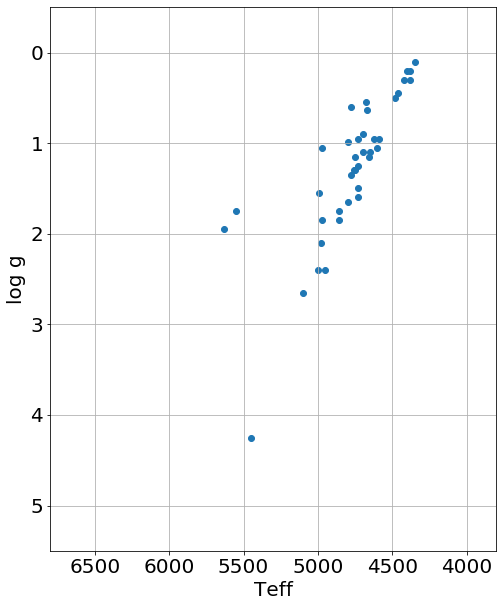

In [90]:
# Plot the isochrone
f = plt.figure(figsize=[8,10])
plt.scatter(smss_param[:,4],smss_param[:,5])
plt.xlabel('Teff')
plt.ylabel('log g')
plt.xlim([6800,3800])
plt.ylim([5.5,-0.5])
plt.grid()
plt.show()

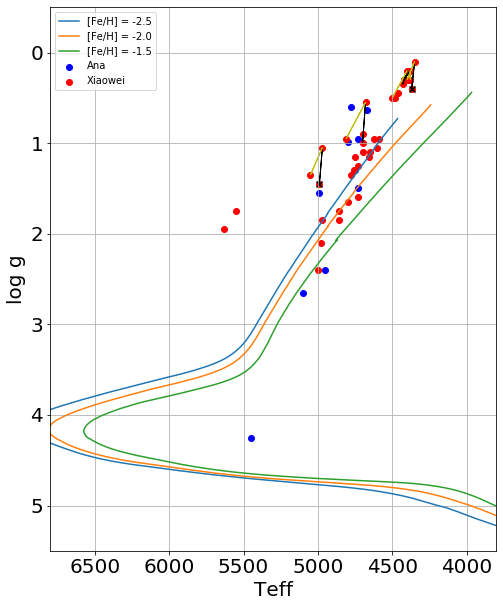

In [94]:
# Plot the isochrone for five ages
# and the stars with how their alteration
f = plt.figure(figsize=[8,10])
plt.plot(10**isochrone_logteff_logg_25[:267,0],isochrone_logteff_logg_25[:267,1],label="[Fe/H] = -2.5")
plt.plot(10**isochrone_logteff_logg_20[:267,0],isochrone_logteff_logg_20[:267,1],label="[Fe/H] = -2.0")
plt.plot(10**isochrone_logteff_logg_15[:267,0],isochrone_logteff_logg_15[:267,1],label="[Fe/H] = -1.5")
# plt.plot(10**isochrone_logteff_logg[267:534,0],isochrone_logteff_logg[267:534,1])
# plt.plot(10**isochrone_logteff_logg[534:800,0],isochrone_logteff_logg[534:800,1])
# plt.plot(10**isochrone_logteff_logg[800:1066,0],isochrone_logteff_logg[800:1066,1])
# plt.plot(10**isochrone_logteff_logg[1066:,0],isochrone_logteff_logg[1066:,1])

# Original
plt.scatter(smss_param[:12,4],smss_param[:12,5],c='b',label='Ana')
plt.scatter(smss_param[12:,4],smss_param[12:,5],c='r',label='Xiaowei')


# Shifted with original list and arrows
plt.scatter(smss_param[:12,20],smss_param[:12,21],c='b')
plt.scatter(smss_param[12:,20],smss_param[12:,21],c='r')
for i in range(len(smss_param[:,0])):
    plt.arrow(smss_param[i,4],smss_param[i,5],smss_param[i,20]-smss_param[i,4],smss_param[i,21]-smss_param[i,5],
              length_includes_head=True,head_width=0.01,head_length=1)
for i in imbalanced_ind:
    plt.scatter(smss_param[i,20],smss_param[i,21],c='k',marker='x')
    
# Shifted with Alex's list and arrows
plt.scatter(smss_param[:12,15],smss_param[:12,16],c='b')
plt.scatter(smss_param[12:,15],smss_param[12:,16],c='r')
for i in range(len(smss_param[:,0])):
    plt.arrow(smss_param[i,4],smss_param[i,5],smss_param[i,15]-smss_param[i,4],smss_param[i,16]-smss_param[i,5],
              length_includes_head=True,color='y')
    
plt.xlabel('Teff')
plt.ylabel('log g')
plt.xlim([6800,3800])
plt.ylim([5.5,-0.5])
plt.grid()
plt.legend(loc=2)
plt.show()
f.savefig("isochrone_all_shifted.pdf",bbox_inches='tight')

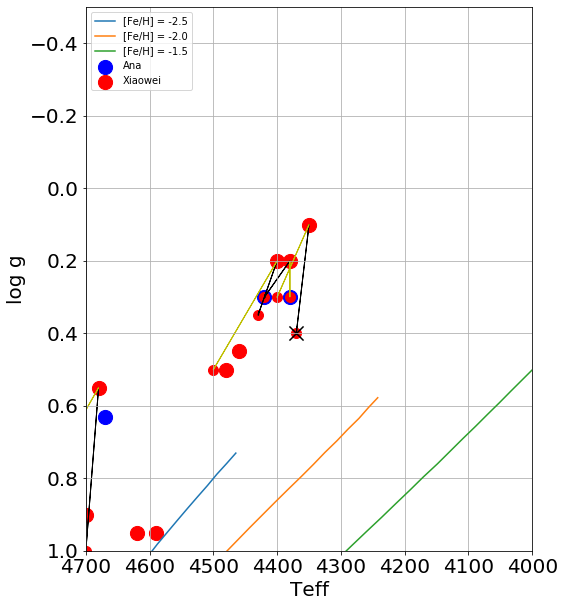

In [99]:
# Zoom in version of the above plot
f = plt.figure(figsize=[8,10])
plt.plot(10**isochrone_logteff_logg_25[:267,0],isochrone_logteff_logg_25[:267,1],label="[Fe/H] = -2.5")
plt.plot(10**isochrone_logteff_logg_20[:267,0],isochrone_logteff_logg_20[:267,1],label="[Fe/H] = -2.0")
plt.plot(10**isochrone_logteff_logg_15[:267,0],isochrone_logteff_logg_15[:267,1],label="[Fe/H] = -1.5")
# plt.plot(10**isochrone_logteff_logg[267:534,0],isochrone_logteff_logg[267:534,1])
# plt.plot(10**isochrone_logteff_logg[534:800,0],isochrone_logteff_logg[534:800,1])
# plt.plot(10**isochrone_logteff_logg[800:1066,0],isochrone_logteff_logg[800:1066,1])
# plt.plot(10**isochrone_logteff_logg[1066:,0],isochrone_logteff_logg[1066:,1])

# Original
plt.scatter(smss_param[:12,4],smss_param[:12,5],c='b',s=200,label='Ana')
plt.scatter(smss_param[12:,4],smss_param[12:,5],c='r',s=200,label='Xiaowei')

# Shifted with original list and arrows
plt.scatter(smss_param[:12,20],smss_param[:12,21],c='b',s=100)
plt.scatter(smss_param[12:,20],smss_param[12:,21],c='r',s=100)
for i in range(len(smss_param[:,0])):
    plt.arrow(smss_param[i,4],smss_param[i,5],smss_param[i,20]-smss_param[i,4],smss_param[i,21]-smss_param[i,5],
              length_includes_head=True,head_width=0.01,head_length=1)
for i in imbalanced_ind:
    plt.scatter(smss_param[i,20],smss_param[i,21],c='k',s=200,marker='x')
    
# Shifted with Alex's list and arrows
plt.scatter(smss_param[:12,15],smss_param[:12,16],c='b',s=100)
plt.scatter(smss_param[12:,15],smss_param[12:,16],c='r',s=100)
for i in range(len(smss_param[:,0])):
    plt.arrow(smss_param[i,4],smss_param[i,5],smss_param[i,15]-smss_param[i,4],smss_param[i,16]-smss_param[i,5],
              length_includes_head=True,color='y')
    
plt.xlabel('Teff')
plt.ylabel('log g')
plt.xlim([4700,4000])
plt.ylim([1,-0.5])
plt.grid()
plt.legend(loc=2)
plt.show()
f.savefig("isochrone_all_shifted_zoom.pdf",bbox_inches='tight')